In [1]:
# Import all libraries
import os
import numpy as np
import matplotlib
import pylab as plt
import random
import h5py
import stainNorm_Reinhard as stainNorm

D:\Programme\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#data dirs
data_dir = './data/'
train_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_train_x.h5')
train_dir_y = os.path.join(data_dir, 'camelyonpatch_level_2_split_train_y.h5')
valid_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_valid_x.h5')
valid_dir_y = os.path.join(data_dir, 'camelyonpatch_level_2_split_valid_y.h5')
test_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_test_x.h5')

dirs = [valid_dir_x, test_dir_x, train_dir_x]
names = ["x_valid", "x_test", "x_train"]
print(train_dir_x)

./data/camelyonpatch_level_2_split_train_x.h5


In [3]:
def getData(data_dir):
    with h5py.File(data_dir, 'r') as hdf:
        data = np.reshape(list(hdf['y']),(len(hdf['y'])))     
        return np.array(data)
    
def getDataSample(data_dir, indices):
    with h5py.File(data_dir, 'r') as hdf:
        data = []
        for i in indices:
            data.append(np.array(list(hdf['x'][i])))
        return np.array(data)

In [4]:
data = np.array([])
with h5py.File(train_dir_y, 'r') as hdf:
        data = np.array(list(hdf['y'][0:100]) )
print(data.shape)
print(data)
        

(100, 1, 1, 1)
[[[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[0]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[0]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[0]]]


 [[[0]]]


 [[[1]]]


 [[[0]]]


 [[[0]]]


 [[[1]]]


 [[[0]]]


 [[[0]]]


 [[[1]

In [7]:
data_dir_x = train_dir_x
data_dir_y = train_dir_y
y_train = getData(data_dir_y)
print(y_train.shape)
print(y_train[0:100])

(262144,)
[0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0]


In [8]:
unique,counts = np.unique(y_train,  return_counts=True)
print(unique)
print(counts)
zeros = np.where(y_train == 0)[0]
ones = np.where(y_train == 1)[0]

[0 1]
[131072 131072]


In [9]:
n_samples = 30
print(zeros[:n_samples])
print(ones[:n_samples])
x_train_samples_zeros = getDataSample(data_dir_x, zeros[:n_samples])
x_train_samples_ones = getDataSample(data_dir_x, ones[:n_samples])

[ 0  4  5  6 13 23 27 32 34 39 41 48 49 50 55 57 62 65 71 75 79 81 82 84
 85 87 88 92 93 94]
[ 1  2  3  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 24 25 26 28 29 30
 31 33 35 36 37 38]


In [10]:
def plotData(data_dir, index, plot_x, plot_y, plot_size):
    data = getDataSample(data_dir, index[:(plot_x*plot_y)])
    plt.rcParams['figure.figsize'] = plot_size
    for i in range(plot_x):
        for j in range(plot_y-1):
            plt.subplot(plot_x,plot_y,j*plot_y+i+1)
            plt.title("x[{}]".format(index[j*plot_y+i]))
            plt.imshow(data[j*plot_y+i])

# Plot of training samples with label zero

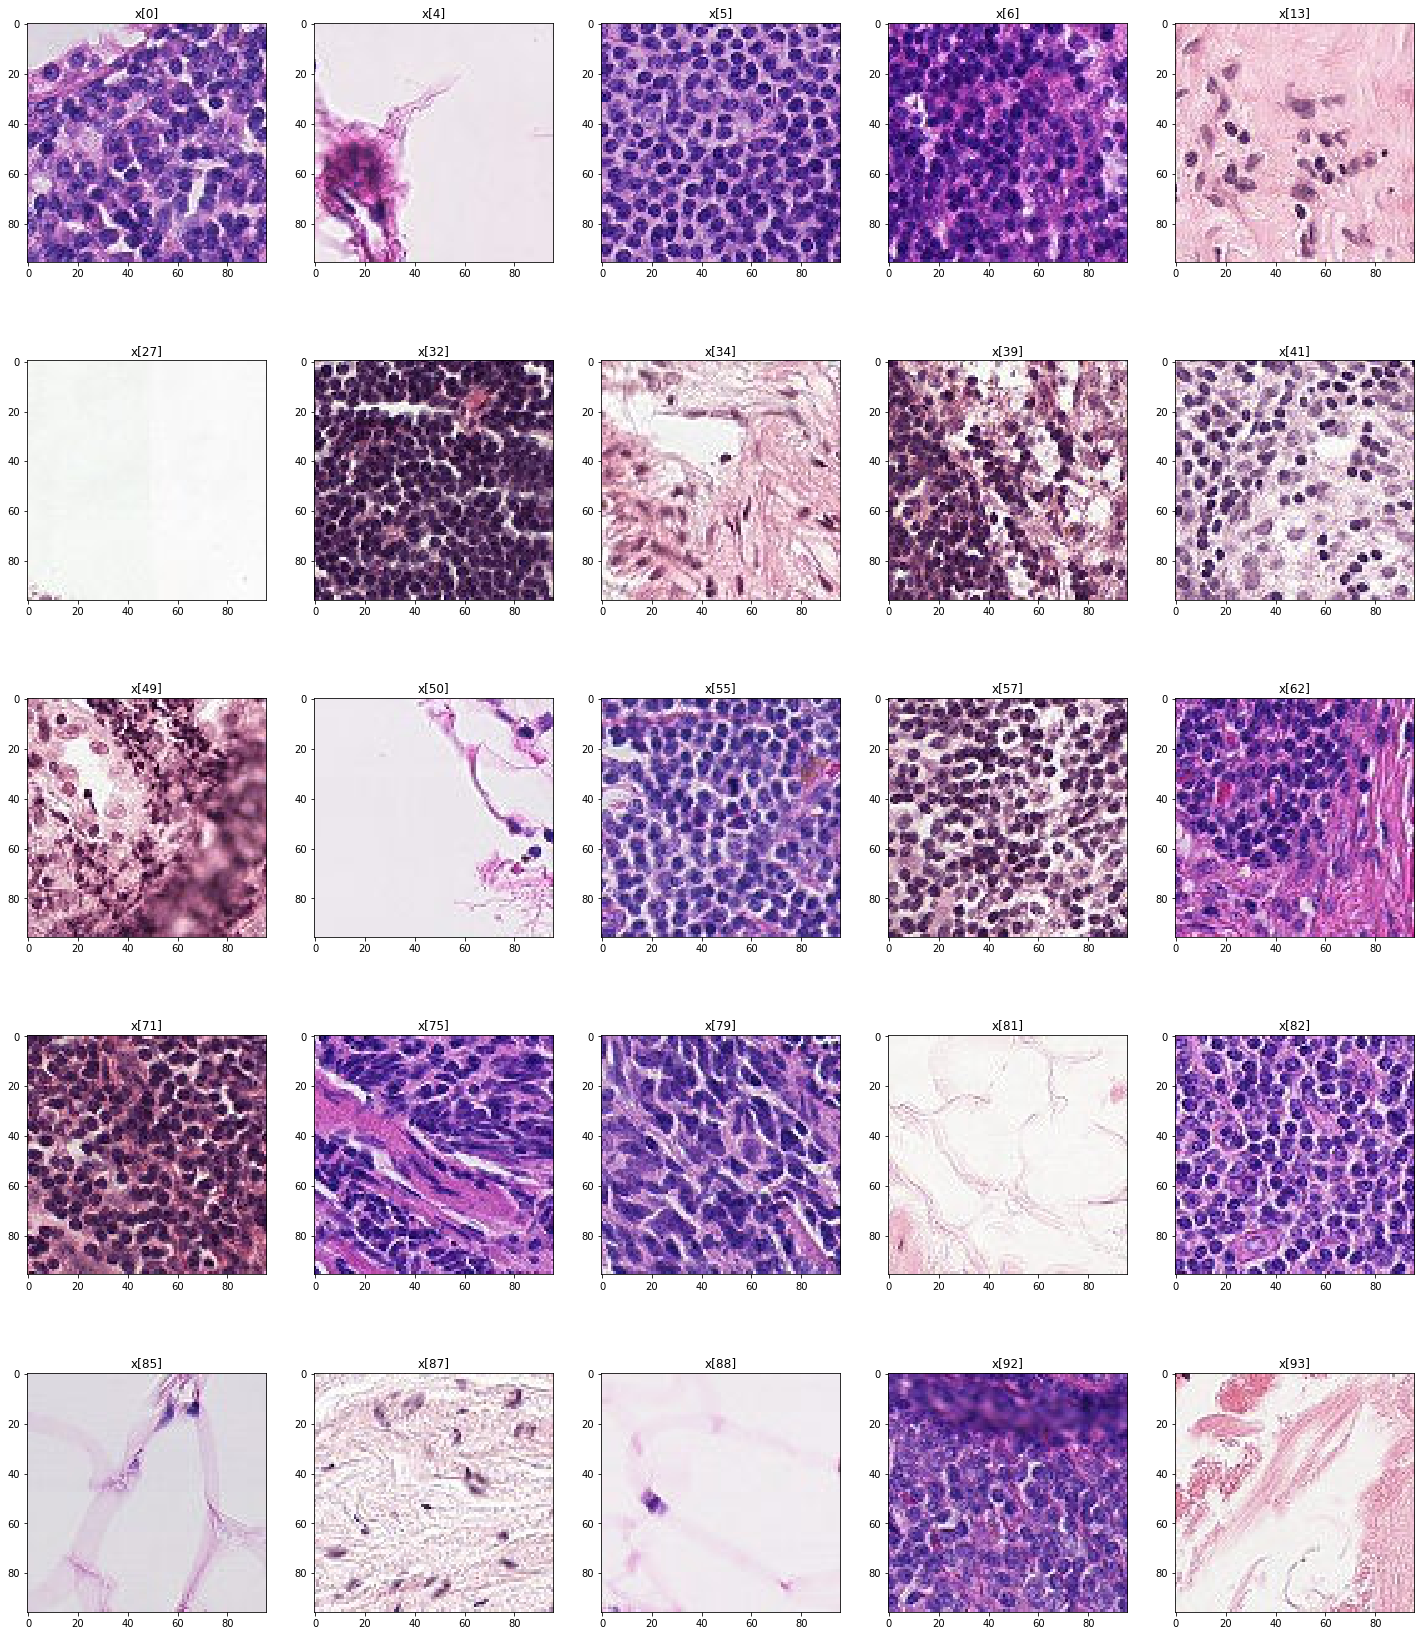

In [11]:
plotData(data_dir_x, zeros, 5, 6,(30,30))

# Plot of training samples with label One

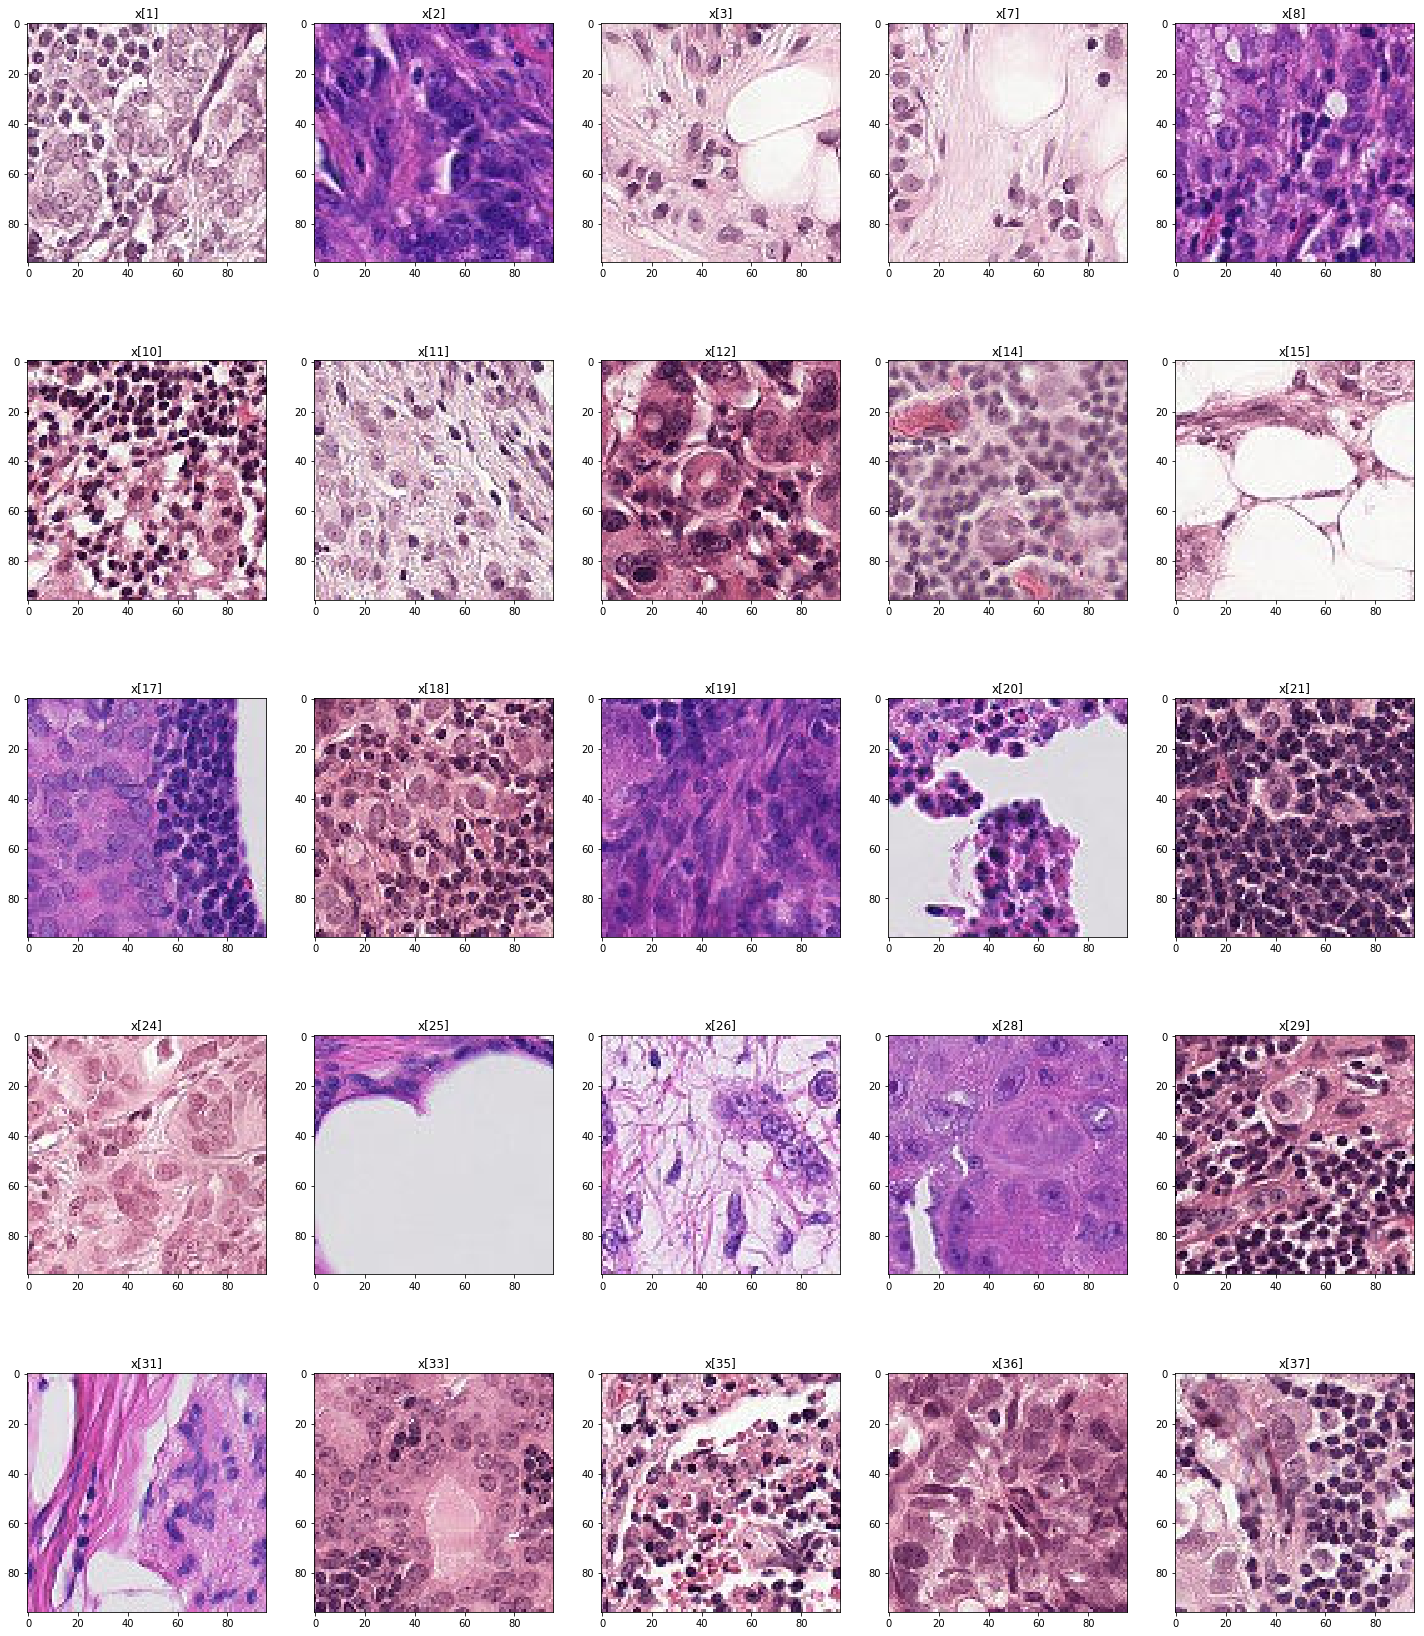

In [12]:
plotData(data_dir_x, ones, 5, 6,(30,30))